In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Perform at least 1 t-test and 1 chi square test.**

In [4]:
tips['is_female'] = pd.get_dummies(tips['sex'], drop_first=True)['Female']
tips.drop(columns=['sex'], inplace=True)

In [5]:
tips.head()

,total_bill,tip,smoker,day,time,size,is_female
0,16.99,1.01,No,Sun,Dinner,2,1
1,10.34,1.66,No,Sun,Dinner,3,0
2,21.01,3.50,No,Sun,Dinner,3,0
3,23.68,3.31,No,Sun,Dinner,2,0
4,24.59,3.61,No,Sun,Dinner,4,1


In [6]:
tips['non_smoker'] = pd.get_dummies(tips['smoker'], drop_first=True)['No']
tips.drop(columns=['smoker'], inplace=True)

In [7]:
tips.head()

,total_bill,tip,day,time,size,is_female,non_smoker
0,16.99,1.01,Sun,Dinner,2,1,1
1,10.34,1.66,Sun,Dinner,3,0,1
2,21.01,3.50,Sun,Dinner,3,0,1
3,23.68,3.31,Sun,Dinner,2,0,1
4,24.59,3.61,Sun,Dinner,4,1,1


In [10]:
# Check for variance for male tippers vs female tippers

In [9]:
not_female = tips[tips.is_female==0]
is_female = tips[tips.is_female==1]
stats.levene(not_female.tip, is_female.tip)


LeveneResult(statistic=1.9909710178779405, pvalue=0.1595236359896614)

In [11]:
# Run statistical test for correlation between sex and tip

In [12]:
stats.ttest_ind(is_female.tip, not_female.tip, 
                equal_var=True)

Ttest_indResult(statistic=-1.3878597054212687, pvalue=0.16645623503456763)

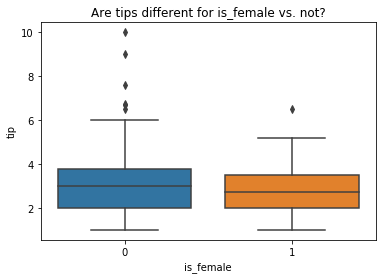

In [27]:
sns.boxplot(tips.is_female, tips.tip)
plt.title("Are tips different for is_female vs. not?")
plt.show()


**No correlation between sex and tip**

In [14]:
# Check for variance between smokers who tip and non-smokers who tip

In [16]:
smoker = tips[tips.non_smoker==0]
non_smoker = tips[tips.non_smoker==1]
stats.levene(non_smoker.tip, smoker.tip)

LeveneResult(statistic=0.02051159105706963, pvalue=0.8862366542563406)

In [17]:
# Run statistical test for correlation between smoking and tip

In [18]:
stats.ttest_ind(smoker.tip, non_smoker.tip, 
                equal_var=True)

Ttest_indResult(statistic=0.09222805186888201, pvalue=0.9265931522244976)

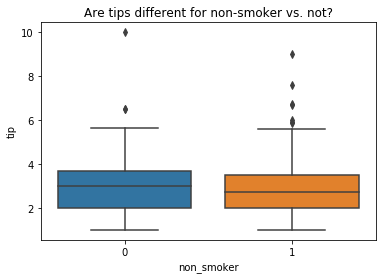

In [29]:
sns.boxplot(tips.non_smoker, tips.tip)
plt.title("Are tips different for non-smoker vs. not?")
plt.show()

**No correlation between smoking and tip**

In [22]:
# Run a chi-squared test comparing two categorical variables

In [24]:
observed = pd.crosstab(tips.non_smoker, tips.is_female)
observed

is_female,0,1
non_smoker,,
0,60,33
1,97,54


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[60 33]
 [97 54]]
---
Expected

[[59.84016393 33.15983607]
 [97.15983607 53.84016393]]
---

chi^2 = 0.0088
p     = 0.9254


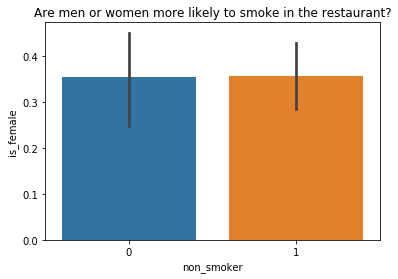

In [31]:
sns.barplot(data=tips, x='non_smoker', y='is_female')
plt.title("Are men or women more likely to smoke in the restaurant?")
plt.show()

**No correlation between being a smoker and sex.**